Model Performance:
Mean Absolute Error (MAE): ₹243,756.48
Mean Squared Error (MSE): ₹78,440,549,944.81
Root Mean Squared Error (RMSE): ₹280,072.40
R² Score: -0.0082

Predicted price for a 2000 sqft house with 3 bedrooms and 2 bathrooms: ₹541,534.12 INR


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


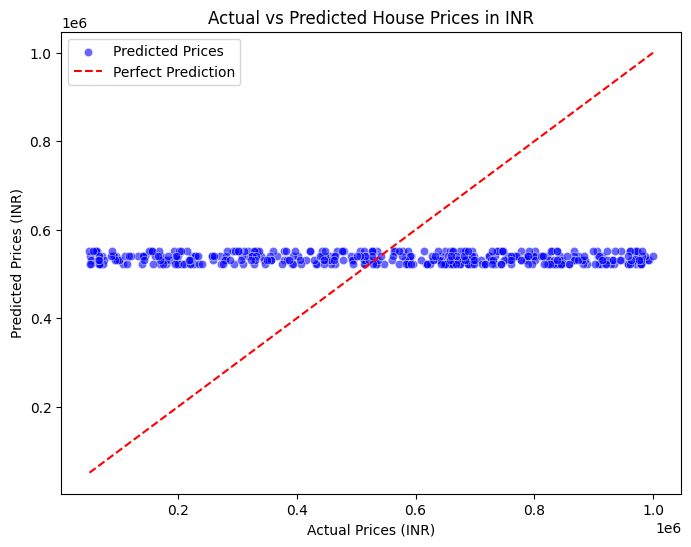

In [ ]:
# Task-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "/content/House Price Prediction Dataset.csv"
df = pd.read_csv(file_path)
df_cleaned = df[['Area', 'Bedrooms', 'Bathrooms', 'Price']].dropna()
X = df_cleaned[['Area', 'Bedrooms', 'Bathrooms']]
y = df_cleaned['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"Mean Squared Error (MSE): ₹{mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

def predict_house_price(area, bedrooms, bathrooms):
    input_data = np.array([[area, bedrooms, bathrooms]])
    predicted_price = model.predict(input_data)[0]
    return round(predicted_price, 2)

example_price = predict_house_price(2000, 3, 2)
print(f"\nPredicted price for a 2000 sqft house with 3 bedrooms and 2 bathrooms: ₹{example_price:,.2f} INR")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label="Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction")
plt.xlabel("Actual Prices (INR)")
plt.ylabel("Predicted Prices (INR)")
plt.title("Actual vs Predicted House Prices in INR")
plt.legend()
plt.show()


Dataset Columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


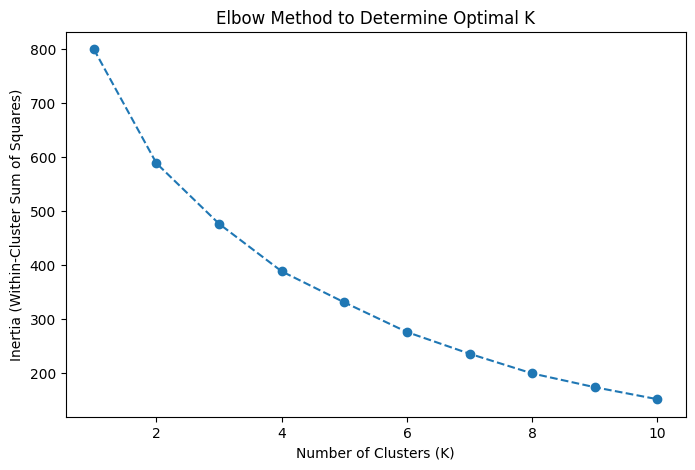

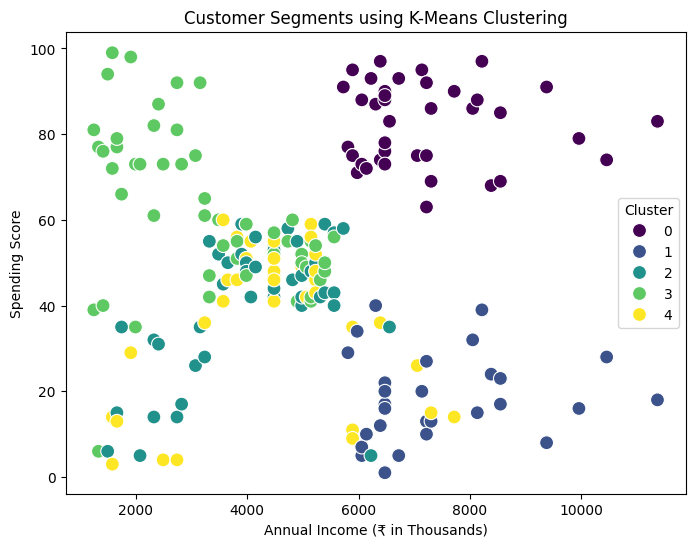


Cluster Summary (INR):
               Age    Gender  Annual Income (k₹)  Spending Score (1-100)
Cluster                                                                 
0        32.692308  0.461538         7182.692308               82.128205
1        36.482759  0.448276         7429.931034               18.000000
2        49.813953  0.000000         4086.302326               40.069767
3        24.907407  0.407407         3296.944444               61.203704
4        55.714286  1.000000         4455.914286               36.771429


In [ ]:
# Task-2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)
print("Dataset Columns:", df.columns)
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())
df['Annual Income (k₹)'] = df['Annual Income (k$)'] * 83
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
features = ['Age', 'Gender', 'Annual Income (k₹)', 'Spending Score (1-100)']
df_cleaned = df[features].dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal K")
plt.show()
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['Annual Income (k₹)'], y=df_cleaned['Spending Score (1-100)'], hue=df_cleaned['Cluster'],
                palette='viridis', s=100)
plt.xlabel("Annual Income (₹ in Thousands)")
plt.ylabel("Spending Score")
plt.title("Customer Segments using K-Means Clustering")
plt.legend(title="Cluster")
plt.show()
cluster_summary = df_cleaned.groupby("Cluster").mean()
print("\nCluster Summary (INR):")
print(cluster_summary)
